In [1]:
import pandas as pd

In [5]:
training_data_df = pd.read_csv('../data/Xtown_ Hate Crime Redesign - Sheet1.csv')

In [6]:
raw_data_df = pd.read_csv('../data/raw_data.csv')

# Map Codes to Sentences

In [140]:
import datetime

In [118]:
raw_data_df[['Location', 'Date Occ']].head()

,Location,Date Occ
0,BURBANK,2018-05-01T00:00:00.000-07:00
1,100 E 6TH ST,2019-04-25T00:00:00.000-07:00
2,300 ALMA REAL DR,2018-05-04T00:00:00.000-07:00
3,5200 TUJUNGA BL,2019-04-27T00:00:00.000-07:00
4,1000 E 49TH PL,2018-05-05T00:00:00.000-07:00


In [150]:
pd.merge(
    pd.to_datetime(raw_data_df['Date Occ'], utc=True).dt.strftime('%Y-%m-%d').to_frame('date'),
    pd.to_datetime(unique_data_df['Datetime'].apply(lambda x: x if '2019' in x else (x + ', 2019')), errors='coerce').dt.strftime('%Y-%m-%d').to_frame('date'),
    how='right'
)

,date
0,2019-06-20
1,2019-06-20
2,2019-06-20
3,2019-06-20
4,2019-06-14
5,2019-06-14
6,2019-06-14
7,2019-06-14
8,2019-06-14
9,2019-06-14


In [135]:
(
 .merge(
    
     .to_frame('date_2'), right_on='date_2', left_on='date_1' 
))

ValueError: You are trying to merge on object and datetime64[ns] columns. If you wish to proceed you should use pd.concat

In [43]:
unique_idx = (data_df
 .pipe(lambda df: df['Location'] + ' ' + df['Datetime'])
 .drop_duplicates()
 .index
)

In [44]:
unique_data_df = data_df.loc[unique_idx]

# Look at sentence overlaps to learn templates

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
import difflib
import itertools

In [72]:
diff_comparison = []

for desc_1_idx in range(len(unique_data_df)):
    for desc_2_idx in range(desc_1_idx+1, len(unique_data_df)):
        ## what is the overlap between desc_1 and desc_2
        d1 = unique_data_df['Description'].iloc[desc_1_idx].strip()
        d2 = unique_data_df['Description'].iloc[desc_2_idx].strip()
        
        d1_sents = list(nlp(d1).sents)
        d2_sents = list(nlp(d2).sents)
        
        for sentence_1, sentence_2 in itertools.product(d1_sents, d2_sents):
        
        max_len = max(len(d1), len(d2))

        diff = difflib.ndiff(d1, d2)
        diff_list = list(diff)
        common_diff = list(filter(lambda x: x[0] not in  ['+', '-', '?'], diff_list))
        diff_ratio = len(common_diff) / max_len
        
        diff_comparison.append({
            'd1': d1,
            'd2': d2,
            'diff_list': diff_list,
            'common_diff': common_diff,
            'diff_ratio': diff_ratio
        })

In [74]:
diff_comp_df = pd.DataFrame(diff_comparison)

In [78]:
%matplotlib inline

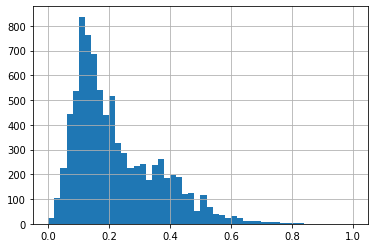

In [80]:
diff_comp_df['diff_ratio'].hist(bins=50)

In [83]:
diff_comp_df.loc[lambda df : df['diff_ratio'] > .4].iloc[0]['common_diff']

['  The',
 '  suspect',
 '  the',
 '  of',
 '  The',
 '  crime',
 '  was',
 '  reported',
 '  as',
 '  a',
 '  hate',
 '  crime',
 '  with']